In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.neighbors import NearestNeighbors
import pickle

# Functions

## Data Analysis

In [ ]:
def display_countplot(df, x, title=None, filename=None):
    """Function to display the countplot for the specified column of the df dataframe
    Args:
        1) df - a dataframe that contains the data required for visualization
        2) x - the name of the dataframe column on which the countplot is built
        3) title - the title of the graph (countplot)
        4) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename 
    """
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=x)
    plt.title(title)
    plt.tight_layout()
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

In [ ]:
def display_countplot_with_xticks(df, x, title=None, x_ticks_step=1, rotation=None, ha='right', filename=None):
    """Function to display a countplot for a specified column of a data frame df using x_ticks spaced by x_ticks_step
    Args:
        1) df - a dataframe that contains the data required for visualization
        2) x - the name of the dataframe column on which the countplot is built
        3) title - the title of the graph (countplot)
        4) x_ticks_step - step for x_ticks 
        5) rotation - rotation angle for x_ticks 
        6) ha - rotation direction for x_ticks
        7) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    """
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=x)
    plt.title(title)
    
    # Determine the positions and labels for x_ticks
    x_ticks = df[x].unique()
    x_ticks.sort()
    x_ticks_positions = range(0, len(x_ticks), x_ticks_step)
    x_ticks_labels = []
    for x_tick_position in x_ticks_positions:
        x_ticks_labels.append(x_ticks[x_tick_position])
    
    # Set x_ticks
    plt.xticks(x_ticks_positions, x_ticks_labels, rotation=rotation, ha=ha)
    
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

## ML Model Training

In [ ]:
def plot_graph(history, string):
    plt.plot(history.history[string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.savefig(f"graphs/{string}.png", bbox_inches='tight')
    plt.show()

In [ ]:
def display_feature_importance(model, feature_names, filename=None):
    """Function for displaying the importance of the feature of the transferred model
    Args:
        1) model - the trained model (after the execution of the fit() method), the importance of features of which should be displayed graphically
        2) feature_names - a list of model feature names, the importance of which should be graphically displayed
        3) filename - the relative path where the file will be saved (with the file name, the file extension is not required) or just the filename
    """
    weights = model.get_weights()
    # Calculate feature importance as the sum of absolute weights for each feature
    feature_importance = np.sum(np.abs(weights[0]), axis=1)

    # Normalize the feature importance values
    normalized_importance = feature_importance / np.sum(feature_importance)

    # Create a bar plot to visualize feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_names, normalized_importance)
    plt.xlabel('Normalized Importance')
    plt.ylabel('Features')
    plt.title('Feature Importance')
    if filename:
        plt.savefig(f'{filename}.png', bbox_inches='tight')
    plt.show()

# Data Cleaning and Preprocessing

In [ ]:
columns = ['pregnancies', 'glucose_concentration', 'blood_pressure', 'triceps_skin_thickness', 'serum_insulin', 'bmi',
           'diabetes_pedigree_function', 'age', 'has_diabetes']
df = pd.read_csv('data/pima-indians-diabetes.csv', names=columns)
df.head()

In [ ]:
df.info()

In [ ]:
len(df[df['pregnancies'] < 0])

### Explore unique values of each column

In [ ]:
print(f'Unique values of each column of dataset')
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

#### Explore the 'pregnancies' column

In [ ]:
df['pregnancies'].unique()

In [ ]:
display_countplot(df=df, x='pregnancies', title='Number of times pregnant', filename='graphs/pregnancies_countplot')

#### Explore the 'glucose_concentration' column

In [ ]:
glucose_arr = df['glucose_concentration'].unique()
glucose_arr

In [ ]:
len(df[df['glucose_concentration']==0])

#### Explore the 'blood_pressure' column

In [ ]:
blood_pressure_arr = df['blood_pressure'].unique()
blood_pressure_arr.sort()
blood_pressure_arr

In [ ]:
len(df[df['blood_pressure']==0])

#### Explore the 'triceps_skin_thickness' column

In [ ]:
triceps_skin_thickness = df['triceps_skin_thickness'].unique()
triceps_skin_thickness.sort()
triceps_skin_thickness

In [ ]:
len(df[df['triceps_skin_thickness']==0])

##### Solution = Imputation

Imputation: If the feature is important and you decide to retain it, you can consider imputing the missing values using techniques such as mean imputation, median imputation, or more advanced methods like k-nearest neighbors imputation. Imputation can help you retain the valuable information while filling in the gaps.

#### Explore the 'serum_insulin' column

In [ ]:
serum_insulin = df['serum_insulin'].unique()
serum_insulin.sort()
serum_insulin

In [ ]:
len(df[df['serum_insulin']==0])

#### Explore the 'bmi' column

In [ ]:
bmi = df['bmi'].unique()
bmi.sort()
bmi

In [ ]:
len(df[df['bmi']==0])

#### Explore the 'diabetes_pedigree_function' column

In [ ]:
diabetes_pedigree_func_arr = df['diabetes_pedigree_function'].unique()
diabetes_pedigree_func_arr.sort()
diabetes_pedigree_func_arr

#### Explore the 'age' column

In [ ]:
age_arr = df['age'].unique()
age_arr.sort()
age_arr

#### Explore the 'has_diabetes' column

In [ ]:
df['has_diabetes'].unique()

### Perform data cleaning

In [ ]:
len(df[(df['glucose_concentration'] == 0) | (df['blood_pressure'] == 0) | (df['bmi'] == 0)])

In [ ]:
df = df[(df['glucose_concentration'] != 0) & (df['blood_pressure'] != 0) & (df['bmi'] != 0)]
df.info()

In [ ]:
len(df[df['triceps_skin_thickness'] == 0])

In [ ]:
triceps_skin_thickness = df['triceps_skin_thickness'].unique()
triceps_skin_thickness.sort()
triceps_skin_thickness

In [ ]:
# Calculate the mean of non-zero values in the column
mean_skin_thickness = int(df[df['triceps_skin_thickness'] != 0]['triceps_skin_thickness'].mean())
print(f"mean_skin_thickness = {mean_skin_thickness}")
# Replace zero values with the mean
df['triceps_skin_thickness'] = df['triceps_skin_thickness'].replace(0, mean_skin_thickness)

len(df[df['triceps_skin_thickness'] == 0])

In [ ]:
triceps_skin_thickness = df['triceps_skin_thickness'].unique()
triceps_skin_thickness.sort()
triceps_skin_thickness

In [ ]:
display_countplot(df=df, x='triceps_skin_thickness', title='Triceps skin fold thickness (mm)')

#### Using K-Nearest Neighbors (KNN) Imputation for the 'triceps_skin_thickness' column

##### View the correlation matrix

In [ ]:
# Construct a correlation matrix between the 'triceps_skin_thickness' column and other characteristics
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.savefig('graphs/correlation_matrix.png', bbox_inches='tight')
plt.show()

##### View the 'triceps_skin_thickness' labels distribution before performing KNN imputation

In [ ]:
display_countplot(df=df, x='triceps_skin_thickness', title='Triceps skin fold thickness (mm)', filename='graphs/triceps_skin_thickness')

##### Perform KNN imputation

In [ ]:
df_knn = df.copy()
# Subset of relevant columns for KNN imputation
subset_columns = ['triceps_skin_thickness', 'serum_insulin', 'bmi']

# Separate data with missing 'triceps_skin_thickness'
missing_data = df_knn[df_knn['triceps_skin_thickness'] == 0][subset_columns]
known_data = df_knn[df_knn['triceps_skin_thickness'] != 0][subset_columns]

# Reset the index of both DataFrames
known_data.reset_index(drop=True, inplace=True)
missing_indexes = missing_data.index
missing_indexes = list(missing_indexes)
# Fit a NearestNeighbors model
neighbors_number = 5
neighbors_model = NearestNeighbors(n_neighbors=neighbors_number)
neighbors_model.fit(known_data.drop('triceps_skin_thickness', axis=1).values)
changed_indexes = []
# Impute missing values using KNN
for index, row in missing_data.iterrows():
    query_point = row.drop('triceps_skin_thickness')
    distances, indices = neighbors_model.kneighbors([query_point])
    avg_triceps_thickness = np.mean([known_data.loc[idx, 'triceps_skin_thickness'] for idx in indices[0]])
    changed_indexes.append(index)
    df_knn.loc[df_knn.index == index, 'triceps_skin_thickness'] = int(avg_triceps_thickness)

print(f"len(df_knn[df_knn['triceps_skin_thickness'] == 0]) = {len(df_knn[df_knn['triceps_skin_thickness'] == 0])}")

##### Check the correctness of KNN imputation

In [ ]:
if missing_indexes != changed_indexes:
    print("missing_indexes != changed_indexes -> invalid rows have been removed")
else:
    print("missing_indexes == changed_indexes")

In [ ]:
print(f"len(df[df['triceps_skin_thickness'] == 0]) = {len(df[df['triceps_skin_thickness'] == 0])}")
print(f"len(df_knn[df_knn['triceps_skin_thickness'] == 0]) = {len(df_knn[df_knn['triceps_skin_thickness'] == 0])}")

In [ ]:
df_knn['triceps_skin_thickness'].unique()

In [ ]:
print(f"len(df['triceps_skin_thickness'].unique()) = {len(df['triceps_skin_thickness'].unique())}")
print(f"len(df_knn['triceps_skin_thickness'].unique()) = {len(df_knn['triceps_skin_thickness'].unique())}")

In [ ]:
print(f"len(df) = {len(df)}")
print(f"len(df_knn) = {len(df_knn)}")

In [ ]:
df_knn.head()

In [ ]:
display_countplot(df=df_knn, x='triceps_skin_thickness', title='Triceps skin fold thickness (mm)')

##### View percentage change in the column 'triceps_skin_thickness' labels using pie-charts

In [ ]:
# Calculate the percentage of each label in the 'triceps_skin_thickness' column in df
thickness_percentages_df = df['triceps_skin_thickness'].value_counts(normalize=True) * 100

# Calculate the percentage of each label in the 'triceps_skin_thickness' column in df_knn
thickness_percentages_knn = df_knn['triceps_skin_thickness'].value_counts(normalize=True) * 100

# Create subplots for pie charts
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot pie chart for original df
# sns.set_palette("Set3")
# axes[0].pie(thickness_percentages_df, labels=thickness_percentages_df.index, autopct='%1.1f%%', startangle=140)
wedges, _ = axes[0].pie(thickness_percentages_df, startangle=90)
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(thickness_percentages_df.index, thickness_percentages_df)]
axes[0].legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes[0].set_title("Original DataFrame")

# Plot pie chart for df_knn
# axes[1].pie(thickness_percentages_knn, labels=thickness_percentages_knn.index, autopct='%1.1f%%', startangle=140)
wedges, _ = axes[1].pie(thickness_percentages_knn, startangle=90)
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(thickness_percentages_knn.index, thickness_percentages_knn)]
axes[1].legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes[1].set_title("DataFrame after KNN imputation")

plt.savefig('graphs/pie_charts.png', bbox_inches='tight')
plt.show()

In [ ]:
# Calculate the percentage of each label in the 'triceps_skin_thickness' column in df
thickness_percentages_df = df['triceps_skin_thickness'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(12, 6))
axes = fig.add_axes([0.1, 0.1, 1, 1])
sns.set_palette("Set3")
# axes.pie(thickness_percentages_df, labels=thickness_percentages_df.index, autopct='%1.1f%%', startangle=140)
wedges, _ = axes.pie(thickness_percentages_df, startangle=90)
legend_labels = [f'{label}: {percent:.1f}%' for label, percent in zip(thickness_percentages_df.index, thickness_percentages_df)]
axes.legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
axes.set_title("Original DataFrame")

plt.savefig('graphs/df_pie_chart.png', bbox_inches='tight')
plt.show()

# Exploratory Data Analysis

## Analysing class label distribution

#### Consider the label distribution of the 'pregnancies' column

In [ ]:
sns.set_style('whitegrid')
display_countplot(df=df_knn, x='pregnancies', title='Number of times pregnant', filename='graphs/pregnancies_countplot')

#### Consider the label distribution of the 'years' column

In [ ]:
display_countplot(df=df_knn, x='age', title='Age (years)', filename='graphs/age_countplot')

#### Consider the label distribution of the 'has_diabetes' column

In [ ]:
display_countplot(df=df_knn, x='has_diabetes', title='has_diabetes labels', filename='graphs/has_diabetes_countplot')

In [ ]:
print(f"len(df_knn[df_knn['has_diabetes']==0]) = {len(df_knn[df_knn['has_diabetes']==0])}")
print(f"len(df_knn[df_knn['has_diabetes']==1]) = {len(df_knn[df_knn['has_diabetes']==1])}")

# Train and test Neural Network Model

## Trying default code

In [ ]:
df_knn.head()

In [ ]:
X = df_knn[columns[:-1]]
y = df_knn['has_diabetes']
X.head()

In [ ]:
print(f"len(X) = {len(X)}")
print(f"len(y) = {len(y)}")

In [ ]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_shape=(8, ), activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X, y, epochs = 150, batch_size=10, verbose=0)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
# plt.rcdefaults()
# plot_graph(history, 'accuracy')
# plot_graph(history, 'loss')

### Try to remove some features

#### Find out which features has the biggest impact on model training

In [ ]:
weights = model.get_weights()
# Calculate feature importance as the sum of absolute weights for each feature
feature_importance = np.sum(np.abs(weights[0]), axis=1)

# Normalize the feature importance values
normalized_importance = feature_importance / np.sum(feature_importance)

# Get feature names
feature_names = ['pregnancies', 'glucose_concentration', 'blood_pressure', 'triceps_skin_thickness',
                 'serum_insulin', 'bmi', 'diabetes_pedigree_function', 'age']

# Create a bar plot to visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, normalized_importance)
plt.xlabel('Normalized Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.savefig('graphs/feature_importance.png', bbox_inches='tight')
plt.show()

#### Removing 'triceps_skin_thickness' column

In [ ]:
df_knn.columns

In [ ]:
X = df_knn[['pregnancies', 'glucose_concentration', 'blood_pressure', 'serum_insulin', 
            'bmi', 'diabetes_pedigree_function', 'age']]
y = df_knn['has_diabetes']
X.head()

In [ ]:
print(f"len(X) = {len(X)}")
print(f"len(y) = {len(y)}")

In [ ]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_shape=(7, ), activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X, y, epochs = 150, batch_size=10, verbose=0)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

##### View feature importance

In [ ]:
features = ['pregnancies', 'glucose_concentration', 'blood_pressure', 'serum_insulin', 'bmi', 'diabetes_pedigree_function', 'age']
display_feature_importance(model=model, feature_names=features)

#### Removing 'diabetes_pedigree_function' column

In [ ]:
X = df_knn[['pregnancies', 'glucose_concentration', 'blood_pressure', 'triceps_skin_thickness', 'serum_insulin', 
            'bmi', 'age']]
y = df_knn['has_diabetes']
X.head()

In [ ]:
print(f"len(X) = {len(X)}")
print(f"len(y) = {len(y)}")

In [ ]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_shape=len(X.columns), ), activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X, y, epochs = 150, batch_size=10, verbose=0)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

##### View feature importance

In [ ]:
features = ['pregnancies', 'glucose_concentration', 'blood_pressure', 'triceps_skin_thickness', 'serum_insulin', 'bmi', 'age']
display_feature_importance(model=model, feature_names=features, filename='graphs/feature_importance')

#### Removing 'diabetes_pedigree_function' and 'pregnancies' columns

In [ ]:
X = df_knn[['glucose_concentration', 'blood_pressure', 'triceps_skin_thickness', 'serum_insulin', 
            'bmi', 'age']]
y = df_knn['has_diabetes']
X.head()

In [ ]:
print(f"len(X) = {len(X)}")
print(f"len(y) = {len(y)}")

In [ ]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_shape=(len(X.columns), ), activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X, y, epochs = 150, batch_size=10, verbose=0)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

##### View feature importance

In [ ]:
features = ['glucose_concentration', 'blood_pressure', 'triceps_skin_thickness', 'serum_insulin', 'bmi', 'age']
display_feature_importance(model=model, feature_names=features, filename='graphs/feature_importance')

#### Removing 'diabetes_pedigree_function', 'pregnancies', 'blood_pressure' and 'triceps_skin_thickness' columns

In [ ]:
X = df_knn[['glucose_concentration', 'serum_insulin', 'bmi', 'age']]
y = df_knn['has_diabetes']
X.head()

In [ ]:
print(f"len(X) = {len(X)}")
print(f"len(y) = {len(y)}")

In [ ]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(12, input_shape=(len(X.columns), ), activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X, y, epochs = 150, batch_size=10, verbose=0)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

##### View feature importance

In [ ]:
features = X.columns
display_feature_importance(model=model, feature_names=features, filename='graphs/feature_importance')

### Changing model architecture

In [ ]:
X = df_knn[columns[:-1]]
y = df_knn['has_diabetes']
X.head()

In [ ]:
print(f"len(X) = {len(X)}")
print(f"len(y) = {len(y)}")

In [ ]:
# define the keras model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(256, input_shape=(len(X.columns), ), activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
history = model.fit(X, y, epochs = 150, batch_size=10, verbose=0)

# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

In [ ]:
plt.rcdefaults()
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

In [ ]:
# Save the training history to a file
with open('model_histories/256_512_1_training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

In [75]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

23/23 [==============================] - 0s 2ms/step - loss: 0.0077 - accuracy: 1.0000
Accuracy: 100.00


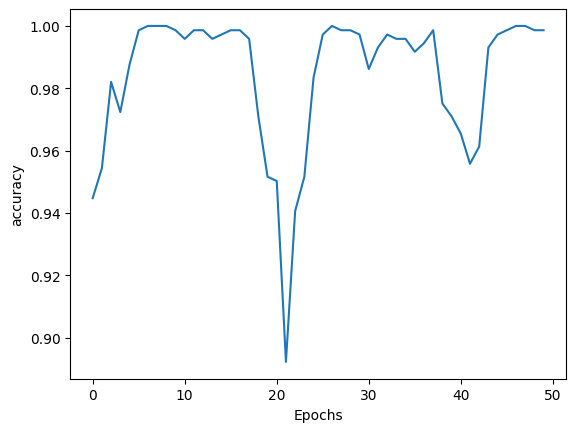

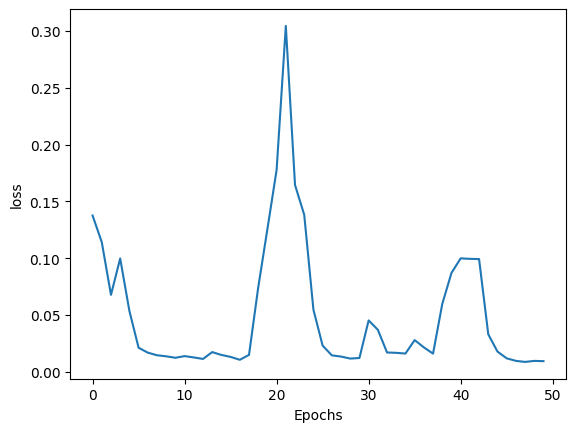

In [76]:
plot_graph(history, 'accuracy')
plot_graph(history, 'loss')

In [ ]:
# Save the training history to a file
with open('model_histories/256_512_1_550_epochs_training_history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

## Split the dataset into train and test

In [ ]:
split_index = int(0.8 * len(df_knn))
train_df = df_knn[:split_index]
test_df = df_knn[split_index:]

print(f"len(train_df) = {len(train_df)}")
print(f"len(test_df) = {len(test_df)}")
print("")
print(f"len(train_df) / len(df_knn) = {len(train_df) / len(df_knn)}")
print(f"len(test_df) / len(df_knn) = {len(test_df) / len(df_knn)}")